<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/feature_selection_with_Lasso_regression_bridging_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('electricty_fund_data.xlsx')

df = df.set_index("Date") # define Date  as index

df.shape

(52608, 11)

In [3]:
X=df.iloc[:, 1:11]
y=df.iloc[:, 0]

In [4]:
X_train = X[:-17472]; X_test = X[-17472:]
y_train = y[:-17472]; y_test = y[-17472:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35136, 10), (35136,), (17472, 10), (17472,))

In [5]:
features = list(X.columns.values)

In [6]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [7]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [8]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-32.801 total time=   0.2s
[CV 2/5] END ................model__alpha=0.1;, score=-26.790 total time=   0.3s
[CV 3/5] END ................model__alpha=0.1;, score=-25.574 total time=   0.3s
[CV 4/5] END ................model__alpha=0.1;, score=-34.139 total time=   0.2s
[CV 5/5] END ................model__alpha=0.1;, score=-47.350 total time=   0.4s
[CV 1/5] END ................model__alpha=0.2;, score=-33.819 total time=   0.1s
[CV 2/5] END ................model__alpha=0.2;, score=-24.490 total time=   0.1s
[CV 3/5] END ................model__alpha=0.2;, score=-25.739 total time=   0.1s
[CV 4/5] END ................model__alpha=0.2;, score=-34.425 total time=   0.1s
[CV 5/5] END ................model__alpha=0.2;, score=-53.646 total time=   0.1s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-35.810 total time=   0.1s
[CV 2/5] END model__alpha=0.30000000000000004;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [9]:
search.best_params_

{'model__alpha': 0.1}

In [10]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [11]:
importance = np.abs(coefficients)

In [12]:
np.array(features)[importance > 0]

array(['Lignite', 'Natural Gas', 'Nuclear', 'Demand DE', 'Wind', 'PV',
       'Gas', 'Coal', 'CO2'], dtype='<U11')

In [13]:
np.array(features)[importance == 0]

array(['Hard Coal'], dtype='<U11')

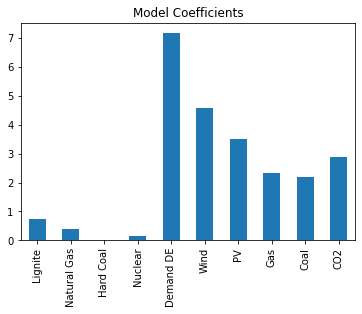

In [14]:
coef = pd.Series(importance ,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')

In [16]:
importance


array([0.7445849 , 0.37634984, 0.        , 0.13552572, 7.16584888,
       4.59484922, 3.51835525, 2.32644975, 2.17536736, 2.89163956])